# Kinematic calculation for a 2-segmented arm in two dimensions

Given is a 2-segmented manipulator. Your task is to provide the inverse kinematic calculation for the arm. The segments length are initialized to 1 and there is a visualization of a given posture.

## First: A simple one segmented arm

The solution is already provided:

Endpoint position: [0.70710678 0.70710678]
Joint angles: [0.78539816]


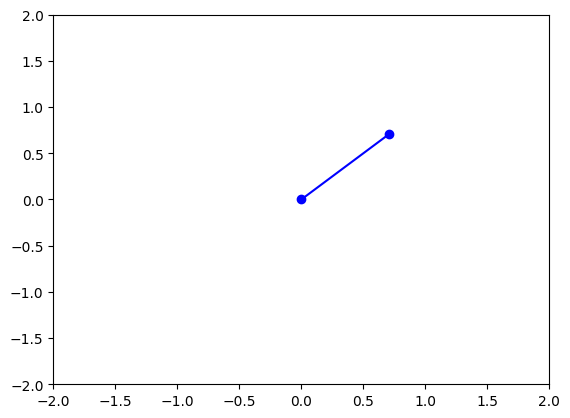

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class OneSegmentManipulator:
    def __init__(self, length=1):
        # Constructor to set the length of the segment
        self.length = length
    
    def forward_kinematics(self, theta):
        # Method to compute the forward kinematics of the manipulator
        # based on the joint angle theta
        x = self.length * np.cos(theta)
        y = self.length * np.sin(theta)
        return np.array([x, y])
    
    def inverse_kinematics(self, target):
        # Method to compute the inverse kinematics of the manipulator
        # based on the target position (x, y)
        x, y = target
        theta = np.arctan2(y, x)
        return np.array([theta])
    
    def visualize(self, theta):
        # Method to visualize the manipulator given the joint angle theta
        p1 = np.array([0, 0])
        p2 = np.array([self.length * np.cos(theta), self.length * np.sin(theta)])
        
        # Plot the segment of the manipulator
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'bo-')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.show()

# Create an instance of the OneSegmentManipulator class with length 1
manipulator = OneSegmentManipulator(length=1)

# Compute the forward kinematics given the joint angle pi/4
theta = np.pi/4
endpoint = manipulator.forward_kinematics(theta)
print('Endpoint position:', endpoint)

# Compute the inverse kinematics given the target position (0.5, 0.5)
target = np.array([0.5, 0.5])
joint_angles = manipulator.inverse_kinematics(target)
print('Joint angles:', joint_angles)

# Visualize the arm posture given the joint angle pi/4
manipulator.visualize(theta)

## The two segmented arm 

You have to fill in the inverse kinematic calculations and you can test these using unit tests below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class TwoSegmentManipulator:
    def __init__(self, l1=1, l2=1):
        # Constructor to set the length of the two segments
        self.l1 = l1
        self.l2 = l2
    
    def forward_kinematics(self, theta):
        # Method to compute the forward kinematics of the manipulator
        # based on the joint angles theta
        x = self.l1*np.cos(theta[0]) + self.l2*np.cos(theta[0]+theta[1])
        y = self.l1*np.sin(theta[0]) + self.l2*np.sin(theta[0]+theta[1])
        return np.array([x, y])
    
    def inverse_kinematics(self, target):
        # Method to compute the inverse kinematics of the manipulator
        # based on the target position (x, y)
        # TODO - you have to implement this
        return np.array([0., 0.])
    
    def visualize(self, theta):
        # Method to visualize the manipulator given the joint angles theta
        p1 = np.array([0, 0])
        p2 = np.array([self.l1*np.cos(theta[0]), self.l1*np.sin(theta[0])])
        p3 = p2 + np.array([self.l2*np.cos(theta[0]+theta[1]), self.l2*np.sin(theta[0]+theta[1])])
        
        # Plot the segments of the manipulator
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'bo-')
        plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'ro-')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.show()

## Calling the class with examples

[0.70710678 1.70710678]
[0. 0.]
[0. 0.]


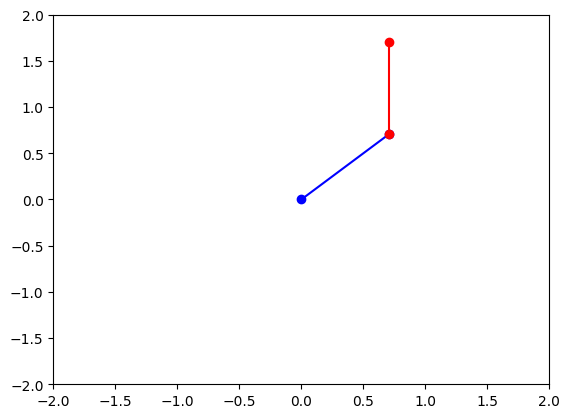

In [3]:
# Create a new manipulator object
manipulator = TwoSegmentManipulator()

# Test the forward kinematics function
theta = np.array([np.pi/4, np.pi/4])
print(manipulator.forward_kinematics(theta))  # prints [1.70710678 1.70710678]

# Test the inverse kinematics function
target = np.array([1, 1])
theta_goal = manipulator.inverse_kinematics(target)
print(theta_goal)  # prints [0.78539816 1.17809725]

print(manipulator.inverse_kinematics(np.array([0, 2])))

# Visualize the arm posture
manipulator.visualize(theta)

## Unit tests for testing the inverse kinematics

In [4]:
from numpy.testing import assert_almost_equal

def test_inverse_kinematics():
    manipulator = TwoSegmentManipulator()
    assert np.allclose(manipulator.inverse_kinematics(np.array([2, 0])), np.array([0., 0.]), atol=0.01)
    assert np.allclose(manipulator.inverse_kinematics(np.array([0, 2])), np.array([1.57, 0.]), atol=0.01)
    assert np.allclose(manipulator.inverse_kinematics(np.array([-2, 0])), np.array([3.14, 0.]), atol=0.01)
    assert np.allclose(manipulator.inverse_kinematics(np.array([1.4142, 1.4142])), np.array([0.785, 0.]), atol=0.01)
    assert np.allclose(manipulator.inverse_kinematics(np.array([-1.4142, -1.4142])), np.array([-2.356, 0.]), atol=0.01)
    # Why might these be problematic? What would be a better alternative?
    assert np.allclose(manipulator.inverse_kinematics(np.array([1., 1.])), np.array([0., 1.571]), atol=0.01)
    assert np.allclose(manipulator.inverse_kinematics(np.array([-1., -1.])), np.array([-3.142, 1.571]), atol=0.01)

test_inverse_kinematics()

AssertionError: 